In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import os
sns.set()
%matplotlib inline

In [ ]:
data = read_csv()

In [2]:
path = os.getcwd()

In [3]:
path

'/predix'

In [7]:
#data = pd.read_csv('./SalaryData.csv')

OSError: File b'./Data/ex1data2.txt' does not exist

In [37]:
#path = os.getcwd() + '/data/ex1data2.csv'

In [4]:
path = os.getcwd() + '/data/ext.txt'

In [5]:
data = pd.read_csv(path,header=None, names=['Size', 'Bedrooms', 'Age', 'Bathrooms', 'Price'])

In [6]:
data.head(5)

,Size,Bedrooms,Age,Bathrooms,Price
0,2104,3,5,1,399900
1,1600,3,8,2,329900
2,2400,3,4,3,369000
3,1416,2,9,1,232000
4,3000,4,3,1,539900


In [7]:
data.shape

(47, 5)

In [8]:
data.isnull().values.any()

False

In [9]:
cols = data.shape[1]

In [10]:
cols

5

In [11]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [12]:
train_set.shape

(37, 5)

In [13]:
test_set.shape

(10, 5)

In [14]:
df_copy = train_set.copy()

In [15]:
df_copy.shape

(37, 5)

In [16]:
df_copy.describe()

,Size,Bedrooms,Age,Bathrooms,Price
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,1960.432432,3.135135,6.486486,1.756757,323170.162162
std,758.663172,0.821995,2.824709,0.796011,116668.500541
min,852.000000,1.000000,1.000000,1.000000,169900.000000
25%,1437.000000,3.000000,4.000000,1.000000,242900.000000
50%,1852.000000,3.000000,6.000000,2.000000,299900.000000
75%,2200.000000,4.000000,9.000000,2.000000,349900.000000
max,4478.000000,5.000000,12.000000,3.000000,699900.000000


In [17]:
df_copy.corr()

,Size,Bedrooms,Age,Bathrooms,Price
Size,1.000000,0.605243,-0.904764,-0.133258,0.873689
Bedrooms,0.605243,1.000000,-0.639234,0.009179,0.468466
Age,-0.904764,-0.639234,1.000000,0.214691,-0.792835
Bathrooms,-0.133258,0.009179,0.214691,1.000000,-0.105784
Price,0.873689,0.468466,-0.792835,-0.105784,1.000000


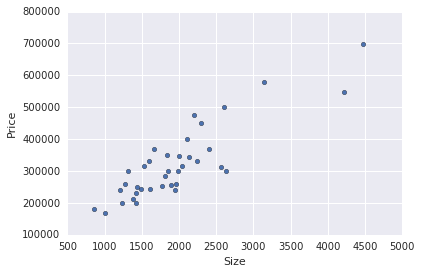

In [18]:
df_copy.plot.scatter(x='Size', y='Price')

In [19]:
import seaborn as sns

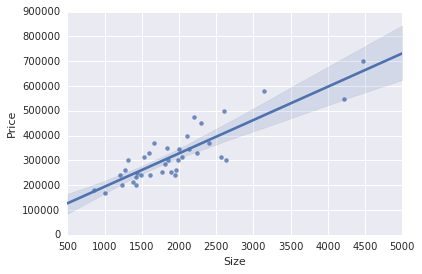

In [20]:
sns.regplot('Size', # Horizontal axis
           'Price', # Vertical axis
           data=df_copy)

In [21]:
test_set_full = test_set.copy()

In [22]:
test_set = test_set.drop(["Price"], axis=1)

In [23]:
test_set.head()

,Size,Bedrooms,Age,Bathrooms
27,2526,3,4,3
39,2162,4,5,2
26,1458,3,9,3
43,1200,3,10,2
24,3890,3,2,1


In [24]:
train_labels = train_set["Price"]

In [25]:
train_labels.head()

8     212000
3     232000
6     314900
40    368500
33    579900
Name: Price, dtype: int64

In [26]:
train_set_full = train_set.copy()

In [27]:
train_set = train_set.drop(["Price"], axis=1)

In [28]:
train_set.head()

,Size,Bedrooms,Age,Bathrooms
8,1380,3,8,2
3,1416,2,9,1
6,1534,3,9,2
40,1664,2,8,1
33,3137,3,2,1


In [29]:
lin_reg = LinearRegression()

In [30]:
lin_reg.fit(train_set, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
price_pred = lin_reg.predict(test_set)

price_pred

array([ 414840.81655686,  342627.16689394,  254732.59594944,
        212510.73140936,  595493.35253777,  213451.8994728 ,
        322903.98017184,  464908.45558081,  457280.30710462,
        191396.05368176])

In [32]:
import pickle

In [33]:
pickle.dump(lin_reg, open('predict.pkl', 'wb'))